In [66]:
%load_ext autoreload
%autoreload 2
%cd ..
import numpy as np
import matplotlib.pyplot as plt
import lkh
import numpy as np
import matplotlib.pyplot as plt
from ortools_solver import CVRP_solver
from utils import random_choose_candidate_2,show_matrix
from QAP_solver import calculate_D, calculate_S_E, calculate_D_prime,add_depot,calculate_T
from optimization_methods import row_wise_optimization, greedy_scheduling
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/yq-mew


In [209]:
def write_tsplib95(distance_matrix, filename="output.vrp"):
    # write the distance matrix to a file in TSPLIB95 format
    with open(filename, 'w') as file:
        # Write the header
        file.write("NAME: GW_test\n")
        file.write("TYPE: ACVRP\n")
        file.write("COMMENT: This file was generated by write_tsplib95.py\n")
        file.write(f"DIMENSION: {(len(distance_matrix))}\n")
        file.write("EDGE_WEIGHT_TYPE: EXPLICIT\n")
        file.write("EDGE_WEIGHT_FORMAT: FULL_MATRIX\n")
        num_jobs = len(distance_matrix)-1
        # VEHICLES is the number of node//8+1
        if num_jobs % 8 == 0:
            file.write(f"VEHICLES: {(num_jobs//8)}\n")
        else:
            # If the number of nodes is not divisible by 8, we need one more vehicle

            file.write(f"VEHICLES: {(num_jobs//8+1)}\n")
        file.write("CAPACITY: 8\n")
        file.write("EDGE_WEIGHT_SECTION\n")
        # Write the distance matrix
        for row in distance_matrix:
            file.write(' '.join(map(str, row)) + '\n')
        file.write("DEMAND_SECTION\n")
        for i in range(len(distance_matrix)):
            if i == 0:
                file.write(f"{i+1} 0\n")
            else:
                file.write(f"{i+1} 1\n")
        file.write("EOF\n")
        
    print(f"TSPLIB95 file '{filename}' created successfully.")

def lkh_optimization(distance_matrix):
    # solve the VRP using LKH
    file_name = "/u/yq/chem1906/Projects/pipette_scheduling/notebooks/output.vrp"
    write_tsplib95(distance_matrix, filename=file_name)
    problem = lkh.LKHProblem.load(file_name)
    solver_path = '/u/yq/chem1906/Projects/pipette_scheduling/src/LKH-3.0.9/LKH'
    route = lkh.solve(solver_path, problem=problem, max_trials=15000, runs=50)
    # remove the first element of the first route
    route[0] = route[0][1:]

    return route
    

In [210]:
a = random_choose_candidate_2(96, 96, 200)
a[a!=0] = 1

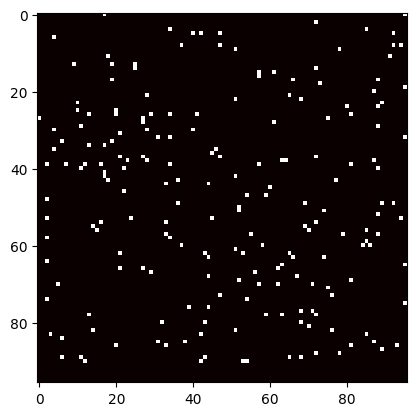

(200, 2)


In [211]:
# read the data
positions = a
# turn the non-zero values into 1
#plot the heatmap
plt.imshow(positions, cmap='hot', interpolation='nearest')
plt.show()
# find the non-zero positions as (dest, source) pairs
non_zero_pos = np.argwhere(positions)
print(non_zero_pos.shape)

In [212]:

jobs = np.argwhere(a)
D_S = calculate_D(a.shape[0])
D_D = calculate_D(a.shape[1])
S, E = calculate_S_E(a)   
# calculate distance matrix
D_prime = calculate_D_prime(D_S,D_D, S, E)
D_prime = add_depot(D_prime)

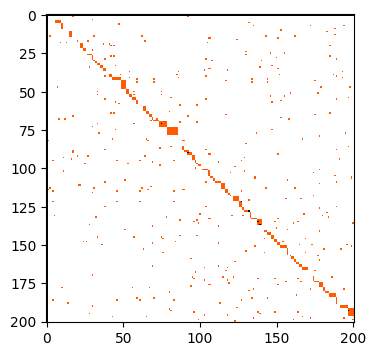

In [213]:
show_matrix(D_prime)

In [214]:
lkh_routes = lkh_optimization(D_prime)

TSPLIB95 file '/u/yq/chem1906/Projects/pipette_scheduling/notebooks/output.vrp' created successfully.


NoToursException: /tmp/tmp0kt0cr7j does not appear to contain any tours. LKH probably did not find solution.

In [ ]:
for lkh_route in lkh_routes:
    # the length is not equal to 8 paddle with -1 to the end
    if len(lkh_route) != 8:
        num_paddles = 8-len(lkh_route)
        for i in range(num_paddles):
            lkh_route.append(-1)

In [197]:
np_routes = np.array(lkh_routes)
np_routes.shape

(247, 8)

In [199]:
# move the rows with -1 to the end
np_routes = np.sort(np_routes, axis=0, kind='mergesort', order=None)[::-1]
np_routes = np_routes -1
# if components are -2 set them to -1
np_routes[np_routes == -2] = -1

In [193]:
t = calculate_T(np_routes)

In [200]:
t = calculate_T(np_routes)
d = D_prime[1:, 1:]
non_optimized_distance = np.trace(np.dot(t.T, d))

In [201]:
non_optimized_distance

np.float64(3219.0)

In [155]:
# flatten the routes as list
routes = []
for route in lkh_routes:
    routes += route
routes = np.array(routes)
routes.shape

(95,)

In [156]:
# sort the routes
np.sort(routes, axis=0)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95])